In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r'C:\Users\admin\Desktop\Study Material\SEM V\Machine Learning\Housing .csv')
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
data.shape

(545, 13)

In [4]:
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [6]:
# List of variables to map
varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, "no": 0})

# Applying the function to the housing list
data[varlist] = data[varlist].apply(binary_map)

In [7]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [8]:
# Get the dummy variables for the feature 'furnishingstatus' and store it in a new variable - 'status'

status = pd.get_dummies(data['furnishingstatus'])

# Check what the dataset 'status' looks like
status.head()

,furnished,semi-furnished,unfurnished
0,True,False,False
1,True,False,False
2,False,True,False
3,True,False,False
4,True,False,False


In [9]:
# Add the results to the original housing dataframe
data = pd.concat([data, status], axis = 1)

# Now let's see the head of our dataframe.
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,furnished,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,True,False,False
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,True,False,False
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,False,True,False
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,True,False,False
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,True,False,False


In [10]:
# Drop 'furnishingstatus' as we have created the dummies for it
data.drop(['furnishingstatus'], axis = 1, inplace = True)

data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,True,False,False
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,True,False,False
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,False,True,False
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,True,False,False
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,True,False,False


In [11]:
data[['furnished', 'semi-furnished', 'unfurnished']] = data[['furnished', 'semi-furnished', 'unfurnished']].map({True: 1, False: 0}.get)

data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1,0,0


In [12]:
data.isnull().sum()

price              0
area               0
bedrooms           0
bathrooms          0
stories            0
mainroad           0
guestroom          0
basement           0
hotwaterheating    0
airconditioning    0
parking            0
prefarea           0
furnished          0
semi-furnished     0
unfurnished        0
dtype: int64

In [13]:
data.shape

(545, 15)

In [14]:
# Split dataset into features (X) and target (y)
X = data.drop('price', axis=1)
y = data['price']
y = pd.DataFrame(y)

In [15]:
X.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished
0,7420,4,2,3,1,0,0,0,1,2,1,1,0,0
1,8960,4,4,4,1,0,0,0,1,3,0,1,0,0
2,9960,3,2,2,1,0,1,0,0,2,1,0,1,0
3,7500,4,2,2,1,0,1,0,1,3,1,1,0,0
4,7420,4,1,2,1,1,1,0,1,2,0,1,0,0


In [16]:
y.head()

,price
0,13300000
1,12250000
2,12250000
3,12215000
4,11410000


In [17]:
# Split the data into training and testing sets (80% train, 20% test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Initialize the models
from sklearn.linear_model import LinearRegression, Lasso, Ridge
linear_model = LinearRegression()
lasso_model = Lasso(alpha=1.0)
ridge_model = Ridge(alpha=1.0)

In [19]:
# Fit the models on the training data
linear_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)
ridge_model.fit(X_train, y_train)

Ridge()

In [20]:
# Predict on the test data
y_pred_linear = linear_model.predict(X_test)
y_pred_lasso = lasso_model.predict(X_test)
y_pred_ridge = ridge_model.predict(X_test)

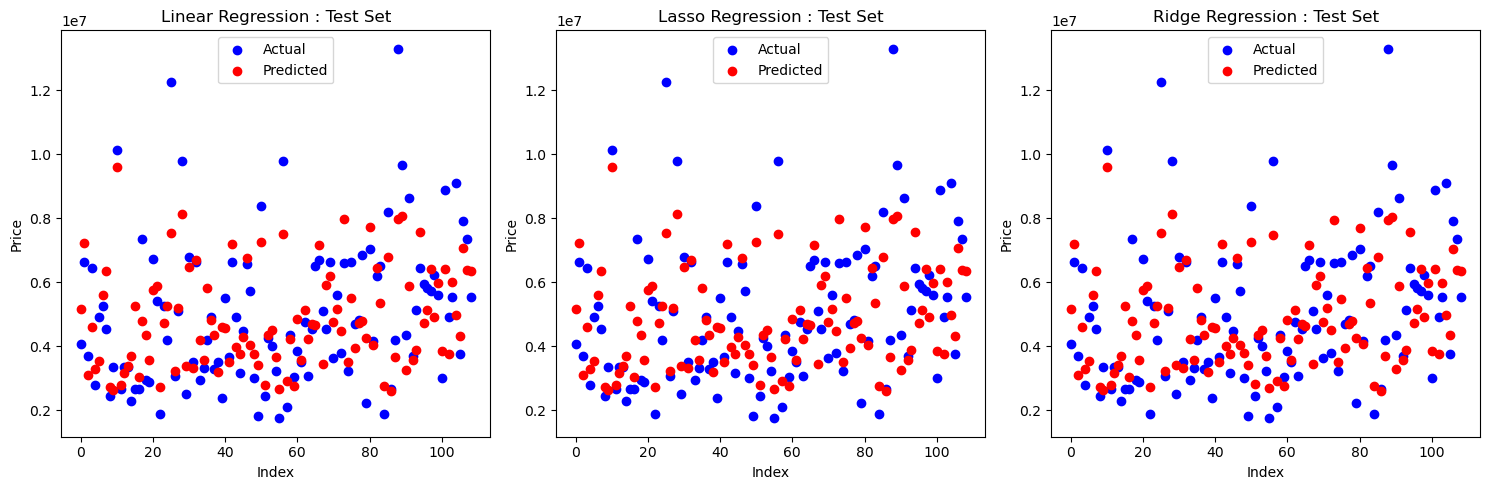

In [21]:
import matplotlib.pyplot as plt

# Plotting Actual vs. Predicted values for Test Set
plt.figure(figsize=(15, 5))  # Make the figure wider for 3 subplots

# Linear Regression
plt.subplot(1, 3, 1)  # First subplot
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')
plt.scatter(range(len(y_pred_linear)), y_pred_linear, color='red', label='Predicted')
plt.title('Linear Regression : Test Set')
plt.xlabel('Index')
plt.ylabel('Price')
plt.legend()

# Lasso Regression
plt.subplot(1, 3, 2)  # Second subplot
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')
plt.scatter(range(len(y_pred_lasso)), y_pred_lasso, color='red', label='Predicted')
plt.title('Lasso Regression : Test Set')
plt.xlabel('Index')
plt.ylabel('Price')
plt.legend()

# Ridge Regression
plt.subplot(1, 3, 3)  # Third subplot
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')
plt.scatter(range(len(y_pred_ridge)), y_pred_ridge, color='red', label='Predicted')
plt.title('Ridge Regression : Test Set')
plt.xlabel('Index')
plt.ylabel('Price')
plt.legend()

# Show the plots
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


In [22]:
# Evaluate the models (Mean Squared Error and R^2 Score)
from sklearn.metrics import mean_squared_error, r2_score

# Train R^2 Scores for each model
train_r2_scores = [
    linear_model.score(X_train, y_train),  # Linear Regression train R^2
    lasso_model.score(X_train, y_train),   # Lasso Regression train R^2
    ridge_model.score(X_train, y_train)    # Ridge Regression train R^2
]

# Test R^2 Scores for each model
test_r2_scores = [
    r2_score(y_test, y_pred_linear),       # Linear Regression test R^2
    r2_score(y_test, y_pred_lasso),        # Lasso Regression test R^2
    r2_score(y_test, y_pred_ridge)         # Ridge Regression test R^2
]

# Mean Squared Errors for each model
mse_scores = [
    mean_squared_error(y_test, y_pred_linear),  # Linear Regression MSE
    mean_squared_error(y_test, y_pred_lasso),   # Lasso Regression MSE
    mean_squared_error(y_test, y_pred_ridge)    # Ridge Regression MSE
]

# Create a DataFrame with the results
results = {
    'Model': ['Linear Regression', 'Lasso Regression', 'Ridge Regression'],
    
    # Mean Squared Error for each model
    'MSE': mse_scores,
    
    # Train R^2 Score
    'Train R^2 Score': train_r2_scores,
    
    # Test R^2 Score
    'Test R^2 Score': test_r2_scores
}

# Convert the results dictionary into a DataFrame for better presentation
import pandas as pd
results_df = pd.DataFrame(results)

# Display the results DataFrame
print(results_df)


               Model           MSE  Train R^2 Score  Test R^2 Score
0  Linear Regression  1.754319e+12         0.685944        0.652924
1   Lasso Regression  1.754323e+12         0.685944        0.652923
2   Ridge Regression  1.756831e+12         0.685907        0.652427
